Text(0.5, 1.0, 'Particle rate per frame')

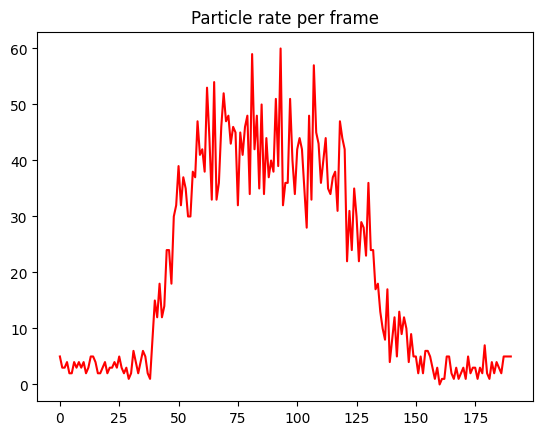

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# flight prg gva, timepix, 12.11.2023
rate = [5, 3, 3, 4, 2, 2, 4, 3, 4, 3, 4, 2, 3, 5, 5, 4, 2, 2, 3, 4, 2, 3, 3, 4, 3, 5, 3, 2, 3, 1, 2, 6, 4, 2, 4, 6, 5, 2, 1, 8, 15, 12, 18, 12, 14, 24, 24, 18, 30, 32, 39, 32, 37, 35, 30, 30, 38, 37, 47, 41, 42, 38, 53, 44, 33, 54, 33, 36, 46, 52, 47, 48, 43, 46, 45, 32, 45, 41, 46, 48, 34, 59, 42, 48, 35, 50, 34, 44, 37, 40, 38, 51, 39, 60, 32, 36, 36, 51, 40, 34, 42, 44, 42, 35, 28, 48, 33, 57, 45, 43, 36, 40, 44, 35, 34, 37, 38, 31, 47, 44, 42, 22, 31, 24, 35, 30, 22, 29, 28, 23, 36, 24, 24, 17, 18, 13, 10, 8, 17, 4, 8, 12, 5, 13, 9, 12, 10, 4, 9, 5, 5, 2, 5, 2, 6, 6, 5, 3, 1, 3, 0, 1, 1, 5, 5, 2, 1, 3, 1, 2, 3, 1, 5, 2, 3, 3, 1, 3, 2, 7, 2, 1, 4, 2, 4, 3, 2, 5, 5, 5, 5]
x = range(0, len(rate))
plt.plot(x, rate, color='red')
plt.title('Particle rate per frame')



Text(0.5, 1.0, 'Total frame energy [keV]')

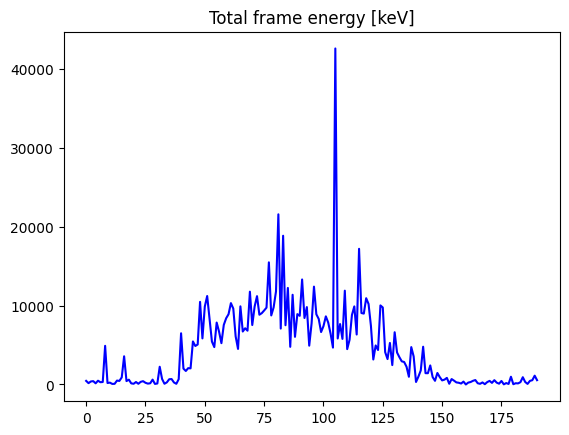

In [2]:
etot = [456, 170, 383, 423, 147, 479, 288, 313, 4903, 185, 236, 73, 81, 495, 451, 897, 3575, 432, 611, 142, 90, 311, 89, 335, 420, 214, 111, 150, 616, 72, 125, 2246, 696, 93, 268, 666, 689, 256, 87, 672, 6494, 2012, 1712, 2071, 2043, 5459, 4882, 5072, 10479, 5844, 9887, 11219, 8318, 5444, 4741, 7856, 6710, 5241, 7557, 8402, 8911, 10320, 9633, 6093, 4511, 9911, 6717, 7132, 6823, 11771, 7541, 9897, 11207, 8848, 9046, 9384, 9746, 15493, 8762, 9778, 11806, 21584, 7092, 18867, 7514, 12246, 4776, 11379, 6044, 8924, 8708, 13319, 8434, 9816, 4923, 7762, 12412, 8903, 8314, 6652, 7400, 8641, 7856, 6444, 4678, 42621, 5834, 7663, 5781, 11899, 4486, 5670, 8815, 9906, 6338, 17209, 9062, 8991, 10944, 10211, 7433, 3170, 4950, 4373, 10029, 9767, 4104, 3221, 5267, 2460, 6626, 4060, 3459, 2933, 2851, 2249, 979, 4739, 3563, 317, 991, 1781, 4789, 1434, 1431, 2417, 945, 464, 1459, 939, 518, 615, 837, 92, 687, 489, 264, 217, 121, 366, 0, 238, 311, 464, 561, 155, 85, 260, 38, 302, 455, 204, 549, 233, 101, 447, 17, 181, 67, 981, 34, 158, 137, 293, 922, 318, 73, 456, 541, 1116, 546]
ex = range(0, len(etot))
plt.plot(ex, etot, color='blue')
plt.title('Total frame energy [keV]')


Text(0.5, 1.0, 'Total frame energy [keV] vs rate')

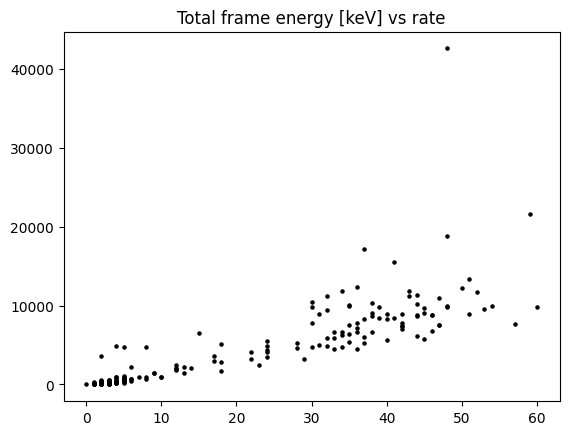

In [3]:
plt.scatter(rate, etot, marker = 'o', s=5, color='black')
plt.title('Total frame energy [keV] vs rate')

In [19]:
157, 598, 419, 553, 284, 525, 750, 477, 19, 749, 526, 177, 142, 7, 168, 583, 296, 491, 254, 5832, 361, 527, 317, 56, 200, 241, 452, 4740, 288, 41, 2051, 615, 227, 402, 401, 428, 473, 877, 139, 38, 172, 880, 0, 200, 272, 10, 129, 272, 335, 283, 2760, 256, 312, 384, 565, 674, 464, 4271, 32, 442, 317, 366, 699, 241, 964, 538, 414, 489, 542, 2673, 1135, 2088, 1533, 1574, 2329, 1443, 1616, 2214, 5570, 1194, 2228, 11976, 5205, 3593, 5587, 7951, 5356, 8618, 9928, 10561, 6083, 7743, 8025, 12633, 7940, 4518, 6470, 6362, 9598, 5280, 6766, 9530, 8754, 9768, 6769, 11091, 9071, 7586, 15824, 8472, 6297, 5474, 6561, 8005, 18703, 15086, 9705, 8001, 10889, 15823, 5868, 6627, 7267, 7708, 5221, 5604, 5652, 4604, 7896, 6492, 6658, 12289, 9660, 5396, 6139, 8997, 7928, 17908, 6748, 6096, 6217, 5945, 4145, 9165, 7452, 4856, 2552, 3423, 9169, 4465, 12803, 2284, 11460, 4035, 3415, 5201, 5833, 5520, 2858, 11799, 2345, 791, 1344, 1236, 1024, 1082, 309, 971, 189, 553, 674, 153, 273, 0, 590, 431, 0, 277, 257, 612, 344, 0, 107, 213, 407, 0, 131, 632, 144, 93, 119, 5209, 774, 288, 187, 6588, 321, 88, 398, 403, 


42621


18703


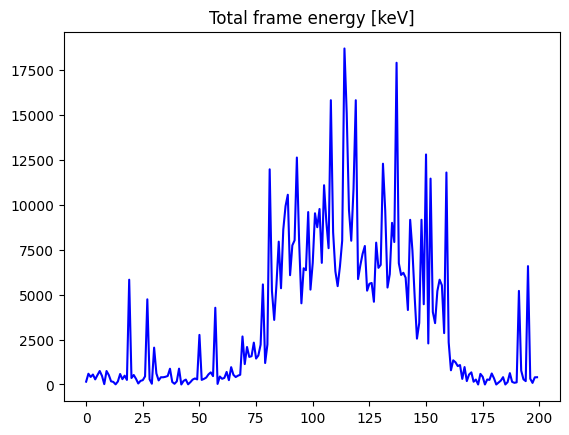

In [6]:
etotgvaprg = [157, 598, 419, 553, 284, 525, 750, 477, 19, 749, 526, 177, 142, 7, 168, 583, 296, 491, 254, 5832, 361, 527, 317, 56, 200, 241, 452, 4740, 288, 41, 2051, 615, 227, 402, 401, 428, 473, 877, 139, 38, 172, 880, 0, 200, 272, 10, 129, 272, 335, 283, 2760, 256, 312, 384, 565, 674, 464, 4271, 32, 442, 317, 366, 699, 241, 964, 538, 414, 489, 542, 2673, 1135, 2088, 1533, 1574, 2329, 1443, 1616, 2214, 5570, 1194, 2228, 11976, 5205, 3593, 5587, 7951, 5356, 8618, 9928, 10561, 6083, 7743, 8025, 12633, 7940, 4518, 6470, 6362, 9598, 5280, 6766, 9530, 8754, 9768, 6769, 11091, 9071, 7586, 15824, 8472, 6297, 5474, 6561, 8005, 18703, 15086, 9705, 8001, 10889, 15823, 5868, 6627, 7267, 7708, 5221, 5604, 5652, 4604, 7896, 6492, 6658, 12289, 9660, 5396, 6139, 8997, 7928, 17908, 6748, 6096, 6217, 5945, 4145, 9165, 7452, 4856, 2552, 3423, 9169, 4465, 12803, 2284, 11460, 4035, 3415, 5201, 5833, 5520, 2858, 11799, 2345, 791, 1344, 1236, 1024, 1082, 309, 971, 189, 553, 674, 153, 273, 0, 590, 431, 0, 277, 257, 612, 344, 0, 107, 213, 407, 0, 131, 632, 144, 93, 119, 5209, 774, 288, 187, 6588, 321, 88, 398, 403 ]
ex2 = range(0, len(etotgvaprg))
plt.plot(ex2, etotgvaprg, color='blue')
plt.title('Total frame energy [keV]')
print(max(etotgvaprg))